In [ ]:
!git clone https://github.com/IDEA-Research/DINO.git

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 442 (delta 136), reused 95 (delta 95), pack-reused 246 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 10.84 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [ ]:
!pip install -r /content/DINO/requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-install-27l24i44/pycocotools_9efc3a988fc94cce9e6a99b94a33c5cf
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-install-27l24i44/pycocotools_9efc3a988fc94cce9e6a99b94a33c5cf
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-install-27l24i44/panopticapi_16b55742190f455497241f20b264aa21
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/panopticapi.git /tmp/pip-install-27l24i44/panopticapi_16b55742190f455497241f20b264aa21
  Resolved https://github.com/cocodataset/panopticapi.git to commit 7bb4655548f98f3fedc07bf37e9040a992b054b0
  Preparing metadata (setup.py) ... done


In [ ]:
!pip install yapf==0.40.1

In [ ]:
!pip install 'numpy<1.24'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/DINO')


In [ ]:
# Step 1: Change to the correct directory
%cd /content/DINO/models/dino/ops

# Step 2: Run the setup.py command
!python setup.py build install

/content/DINO/models/dino/ops
running build
running build_py
copying functions/__init__.py -> build/lib.linux-x86_64-cpython-310/functions
copying functions/ms_deform_attn_func.py -> build/lib.linux-x86_64-cpython-310/functions
copying modules/ms_deform_attn.py -> build/lib.linux-x86_64-cpython-310/modules
copying modules/__init__.py -> build/lib.linux-x86_64-cpython-310/modules
running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:495: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:414: UserWarning: The detected CUDA version (12.2) has a minor version mismatch with the version that was used to compile PyTorch (12.1). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cu

In [ ]:
!python test.py

* True check_forward_equal_with_pytorch_double: max_abs_err 8.67e-19 max_rel_err 2.35e-16
* True check_forward_equal_with_pytorch_float: max_abs_err 4.66e-10 max_rel_err 1.13e-07
* True check_gradient_numerical(D=30)
* True check_gradient_numerical(D=32)
* True check_gradient_numerical(D=64)
* True check_gradient_numerical(D=71)
* True check_gradient_numerical(D=1025)
Traceback (most recent call last):
  File "/content/DINO/models/dino/ops/test.py", line 86, in <module>
    check_gradient_numerical(channels, True, True, True)
  File "/content/DINO/models/dino/ops/test.py", line 76, in check_gradient_numerical
    gradok = gradcheck(func, (value.double(), shapes, level_start_index, sampling_locations.double(), attention_weights.double(), im2col_step))
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 2053, in gradcheck
    return _gradcheck_helper(**args)
  File "/usr/local/lib/python3.10/dist-packages/torch/autograd/gradcheck.py", line 2082, in _gradche

In [ ]:
import numpy as np
print(np.__version__)

1.23.5


*Make sure a folder called COCDIR exists before running the below cell*

In [ ]:
import shutil
import os
import random
import json

# Base directory for COCO format in Google Colab
base_dir = '/content/DINO/COCODIR'
image_target_train_dir = os.path.join(base_dir, 'train2017')
image_target_val_dir = os.path.join(base_dir, 'val2017')
annotation_dir = os.path.join(base_dir, 'annotations')
train_annotation_path = os.path.join(annotation_dir, 'instances_train2017.json')
val_annotation_path = os.path.join(annotation_dir, 'instances_val2017.json')

# Create directories if they don't exist
os.makedirs(image_target_train_dir, exist_ok=True)
os.makedirs(image_target_val_dir, exist_ok=True)
os.makedirs(annotation_dir, exist_ok=True)  # Ensure annotation directory exists

# Load your custom dataset annotations
annotation_file = '/content/DINO/random_sample_mavi_2_gt.json'  # Adjust this path if necessary
with open(annotation_file, 'r') as f:
    coco_data = json.load(f)

# Shuffle the images randomly
image_data = coco_data['images']
random.shuffle(image_data)

# Split the images into train (160 images) and val (40 images)
train_images = image_data[:160]
val_images = image_data[160:200]

# Function to copy images to target directory
def copy_images(images, target_dir):
    for img_info in images:
        img_filename = img_info['file_name']
        src_path = os.path.join('/content/DINO/Pedestrian_dataset_for_internship_assignment', img_filename)  # Adjust this path if necessary
        dst_path = os.path.join(target_dir, img_filename)

        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)
        else:
            print(f"Image not found: {src_path}")

# Copy train images
copy_images(train_images, image_target_train_dir)

# Copy validation images
copy_images(val_images, image_target_val_dir)

# Filter annotations based on the split images
def filter_annotations(images, annotations):
    image_ids = [img['id'] for img in images]
    filtered_annotations = [ann for ann in annotations if ann['image_id'] in image_ids]
    return filtered_annotations

# Create new annotations for train and val
train_annotations = filter_annotations(train_images, coco_data['annotations'])
val_annotations = filter_annotations(val_images, coco_data['annotations'])

# Create new annotation files in COCO format
def create_annotation_file(images, annotations, save_path):
    new_coco_structure = {
        'images': images,
        'annotations': annotations,
        'categories': coco_data['categories'],
        'info': coco_data.get('info', {}),
        'licenses': coco_data.get('licenses', [])
    }

    with open(save_path, 'w') as f:
        json.dump(new_coco_structure, f)
    print(f"Annotations saved to {save_path}")

# Save train and val annotations
create_annotation_file(train_images, train_annotations, train_annotation_path)
create_annotation_file(val_images, val_annotations, val_annotation_path)

print("Train and validation images and annotations have been successfully created.")


Annotations saved to /content/DINO/COCODIR/annotations/instances_train2017.json
Annotations saved to /content/DINO/COCODIR/annotations/instances_val2017.json
Train and validation images and annotations have been successfully created.


In [ ]:
#import os
#import shutil

# Define the paths to the directories
#train_dir = '/content/DINO/train2017'
#val_dir = '/content/DINO/val2017'

# Function to delete all files in a directory
#def delete_all_files(directory):
    #if os.path.exists(directory):
        #shutil.rmtree(directory)  # Remove the entire directory and its contents
        #os.makedirs(directory)      # Recreate the empty directory
        #print(f"All files in '{directory}' have been deleted.")
    #else:
        #print(f"Directory '{directory}' does not exist.")

# Delete files in both directories
#delete_all_files(train_dir)
#delete_all_files(val_dir)


All files in '/content/DINO/train2017' have been deleted.
All files in '/content/DINO/val2017' have been deleted.


In [ ]:
%cd /content/DINO

/content/DINO


** Evaluation for 12 epoch setting **

In [ ]:

coco_path = "/content/DINO/COCODIR"
checkpoint_path = "/content/drive/MyDrive/checkpoint0011_4scale.pth"
eval_script_path = "/content/DINO/scripts/DINO_eval.sh"

!bash {eval_script_path} {coco_path} {checkpoint_path}


Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 08:00:21.682]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 08:00:21.682]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/DINO/COCODIR --eval --resume /content/drive/MyDrive/checkpoint0011_4scale.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 08:00:21.683]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 08:00:21.683]: world size: 1
[09/24 08:00:21.683]: rank: 0
[09/24 08:00:21.683]: local_rank: 0
[09/24 08:00:21.683]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/DINO/COCODIR', coco_panoptic_path=None, remove_dif

**Evaluation for 24 epoch setting **

In [ ]:

coco_path = "/content/DINO/COCODIR"
checkpoint_path = "/content/drive/MyDrive/checkpoint0011_4scale24.pth"
eval_script_path = "/content/DINO/scripts/DINO_eval.sh"

!bash {eval_script_path} {coco_path} {checkpoint_path}


Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 08:00:55.513]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 08:00:55.513]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/DINO/COCODIR --eval --resume /content/drive/MyDrive/checkpoint0011_4scale24.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 08:00:55.514]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 08:00:55.514]: world size: 1
[09/24 08:00:55.514]: rank: 0
[09/24 08:00:55.514]: local_rank: 0
[09/24 08:00:55.514]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/DINO/COCODIR', coco_panoptic_path=None, remove_d

**Evaluation for 36 epoch setting**

In [ ]:

coco_path = "/content/DINO/COCODIR"
checkpoint_path = "/content/drive/MyDrive/checkpoint0011_4scale36.pth"
eval_script_path = "/content/DINO/scripts/DINO_eval.sh"

!bash {eval_script_path} {coco_path} {checkpoint_path}


Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 08:01:21.692]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 08:01:21.692]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/DINO/COCODIR --eval --resume /content/drive/MyDrive/checkpoint0011_4scale36.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 08:01:21.693]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 08:01:21.693]: world size: 1
[09/24 08:01:21.693]: rank: 0
[09/24 08:01:21.693]: local_rank: 0
[09/24 08:01:21.693]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/DINO/COCODIR', coco_panoptic_path=None, remove_d

 Average Precision (AP) values obtained from the validation set

In [ ]:
import subprocess
import re


def run_evaluation(coco_path, checkpoint_path, eval_script_path):
    command = f"bash {eval_script_path} {coco_path} {checkpoint_path}"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    return result.stdout


def extract_ap_metrics(output):
    ap_metrics = {}


    ap_50_95 = re.search(r"Average Precision.+IoU=0\.50:0\.95.+area=.+all.+maxDets=100.+?= (0\.\d+)", output)
    ap_50 = re.search(r"Average Precision.+IoU=0\.50.+area=.+all.+maxDets=100.+?= (0\.\d+)", output)
    ap_75 = re.search(r"Average Precision.+IoU=0\.75.+area=.+all.+maxDets=100.+?= (0\.\d+)", output)
    ap_small = re.search(r"Average Precision.+IoU=0\.50:0\.95.+area=.+small.+maxDets=100.+?= (0\.\d+)", output)
    ap_medium = re.search(r"Average Precision.+IoU=0\.50:0\.95.+area=.+medium.+maxDets=100.+?= (0\.\d+)", output)
    ap_large = re.search(r"Average Precision.+IoU=0\.50:0\.95.+area=.+large.+maxDets=100.+?= (0\.\d+)", output)

    if ap_50_95: ap_metrics['AP@[IoU=0.50:0.95]'] = float(ap_50_95.group(1))
    if ap_50: ap_metrics['AP@[IoU=0.50]'] = float(ap_50.group(1))
    if ap_75: ap_metrics['AP@[IoU=0.75]'] = float(ap_75.group(1))
    if ap_small: ap_metrics['AP@Small'] = float(ap_small.group(1))
    if ap_medium: ap_metrics['AP@Medium'] = float(ap_medium.group(1))
    if ap_large: ap_metrics['AP@Large'] = float(ap_large.group(1))

    return ap_metrics


coco_path = "/content/DINO/COCODIR"
eval_script_path = "/content/DINO/scripts/DINO_eval.sh"


checkpoints = {
    "12_epoch": "/content/drive/MyDrive/checkpoint0011_4scale.pth",
    "24_epoch": "/content/drive/MyDrive/checkpoint0011_4scale24.pth",
    "36_epoch": "/content/drive/MyDrive/checkpoint0011_4scale36.pth"
}


ap_results = {}
for epoch, checkpoint_path in checkpoints.items():
    print(f"Running evaluation for {epoch}...")
    output = run_evaluation(coco_path, checkpoint_path, eval_script_path)
    ap_results[epoch] = extract_ap_metrics(output)


import pandas as pd

df = pd.DataFrame.from_dict(ap_results, orient='index')
print(df)


Running evaluation for 12_epoch...
Running evaluation for 24_epoch...
Running evaluation for 36_epoch...
          AP@[IoU=0.50:0.95]  AP@[IoU=0.50]  AP@[IoU=0.75]  AP@Small  AP@Large
12_epoch               0.478          0.478          0.519     0.367     0.636
24_epoch               0.478          0.478          0.519     0.367     0.636
36_epoch               0.478          0.478          0.519     0.367     0.636


In [ ]:
import os, sys
import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

**Initialize and Load Pre-trained Models**

In [ ]:
%cd /content/DINO/models/dino/ops

/content/DINO/models/dino/ops


In [ ]:
!python setup.py build_ext --inplace

running build_ext
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:495: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:414: UserWarning: The detected CUDA version (12.2) has a minor version mismatch with the version that was used to compile PyTorch (12.1). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:424: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 12.2
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
copying build/lib.linux-x86_64-cpython-310/MultiScaleDeformableAttention.cpython-310-x86_64-linux-gnu.s

In [ ]:
model_config_path = "/content/DINO/config/DINO/DINO_4scale.py"
model_checkpoint_path = "/content/drive/MyDrive/checkpoint0011_4scale.pth"

In [ ]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

<ipython-input-196-72ca36f16c8d>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location='cpu')


In [ ]:
# load coco names
with open('/content/DINO/util/coco_id2name.json') as f:
    id2name = json.load(f)
    id2name = {int(k):v for k,v in id2name.items()}

**Visualize images from a dataloader**

In [ ]:

args.dataset_file = 'coco'
args.coco_path = "/content/DINO/COCODIR"
args.fix_size = False

# Build the validation dataset
dataset_val = build_dataset(image_set='val', args=args)


data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


**Get an Example and Visualize it**

In [ ]:
image, targets = dataset_val[9]

**The image being generated after running the below cell is the actual result**

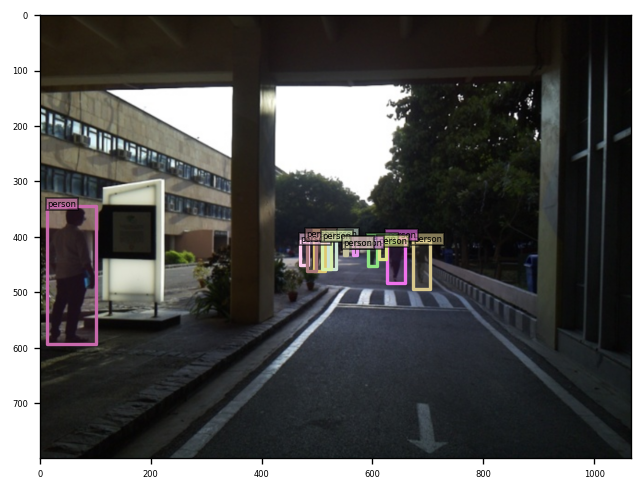

In [ ]:
# Define id2name for the single class
id2name = {1: "person"}  # Assuming class ID for "person" is 1

# Build gt_dict for visualization
box_label = [id2name[int(item)] for item in targets['labels']]
gt_dict = {
    'boxes': targets['boxes'],
    'image_id': targets['image_id'],
    'size': targets['size'],
    'box_label': box_label,
}

# Visualize
vslzr = COCOVisualizer()
vslzr.visualize(image, gt_dict, savedir=None)


**Visualize Model Predictions**

In [ ]:
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

In [ ]:
thershold = 0.3

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

**The image being generated after running the below cell is the predcited result**

AssertionError: 10 = 14, 

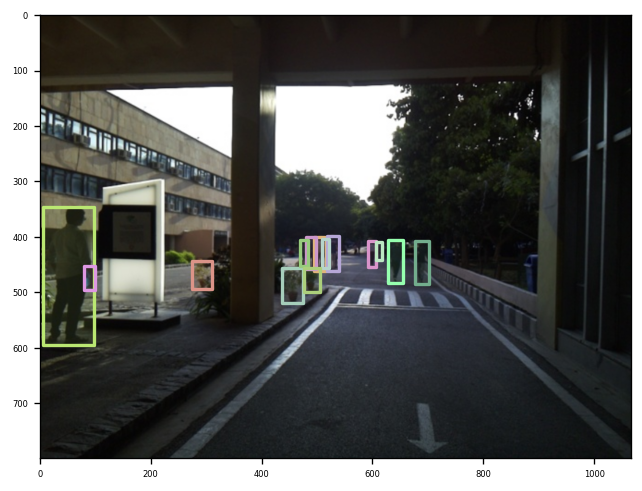

In [ ]:

filtered_labels = labels[select_mask]
filtered_boxes = boxes[select_mask]


id2name = {1: "person"}


box_label = [id2name[int(item)] for item in filtered_labels if int(item) in id2name]

# Create pred_dict
pred_dict = {
    'boxes': filtered_boxes,
    'size': targets['size'],
    'box_label': box_label
}

# Visualize
vslzr.visualize(image, pred_dict, savedir=None)




**Model Evaluation: Ground Truth vs. Predicted Bounding Box Visualization (Epochs 12, 24, 36)-Analysis on Pre-trained model**

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Running for 12 epoch checkpoint:


<ipython-input-38-2d80eb170a8e>:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location='cpu')


Visualizing Actual Bounding Boxes


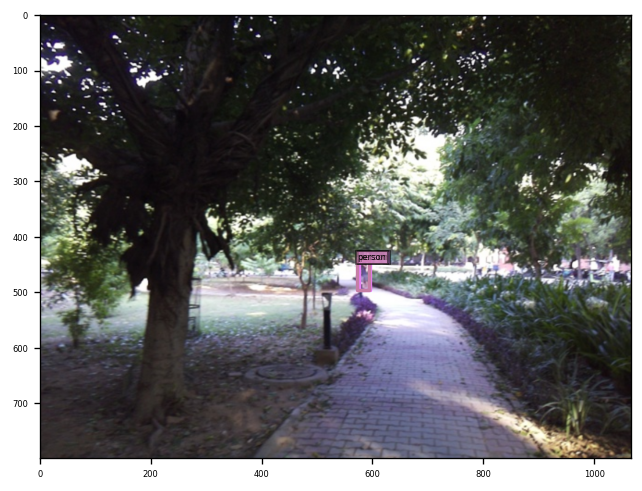

Visualizing Predicted Bounding Boxes


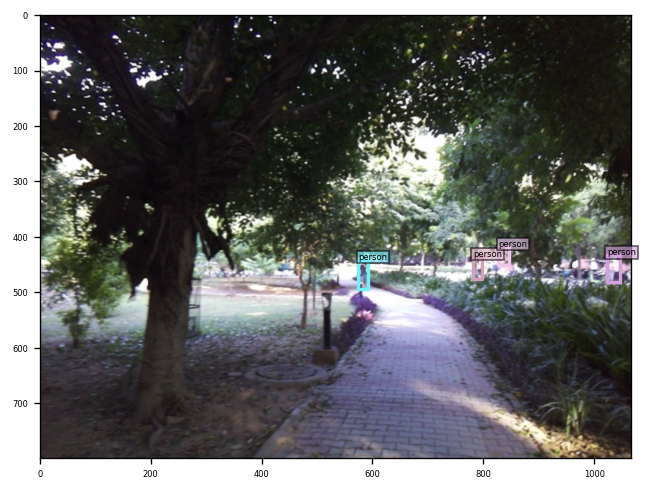

Visualizing Actual Bounding Boxes


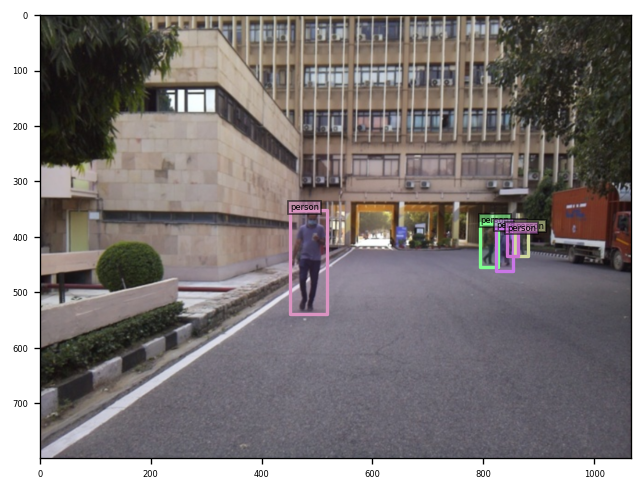

Visualizing Predicted Bounding Boxes


AssertionError: 5 = 6, 

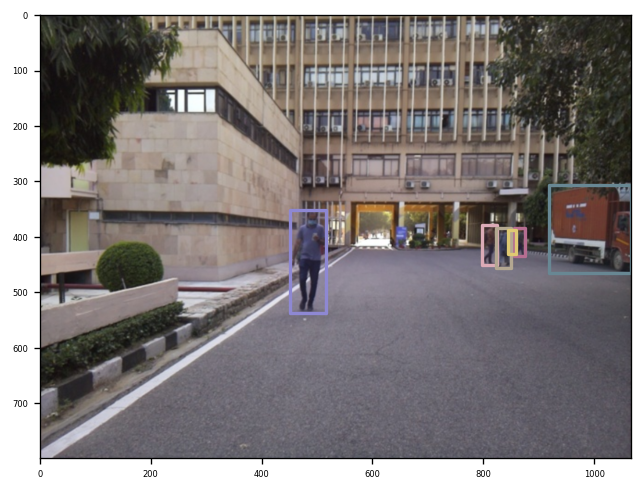

In [ ]:
import os, torch, json
from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

# Common configuration and dataset loading
model_config_path = "/content/DINO/config/DINO/DINO_4scale.py"
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
args.dataset_file = 'coco'
args.coco_path = "/content/DINO/COCODIR"
args.fix_size = False

# Build the validation dataset
dataset_val = build_dataset(image_set='val', args=args)

# COCO visualizer instance
vslzr = COCOVisualizer()

# Single class dictionary for "person"
id2name = {1: "person"}

# Function to visualize ground truth (actual) bounding boxes
def visualize_actual(image, targets):
    # Ground Truth Visualization (Actual)
    gt_box_label = [id2name[int(item)] for item in targets['labels']]
    gt_dict = {
        'boxes': targets['boxes'],
        'image_id': targets['image_id'],
        'size': targets['size'],
        'box_label': gt_box_label,
    }

    # Visualize the actual image with ground truth boxes
    print("Visualizing Actual Bounding Boxes")
    vslzr.visualize(image, gt_dict, savedir=None)

# Function to visualize model predictions (predicted)
def visualize_predicted(image, output, targets, threshold=0.3):
    # Model Prediction Visualization
    scores = output['scores']
    labels = output['labels']
    boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
    select_mask = scores > threshold
    filtered_labels = labels[select_mask]
    filtered_boxes = boxes[select_mask]

    # Create a dictionary for the predicted boxes
    pred_box_label = [id2name[int(item)] for item in filtered_labels if int(item) in id2name]
    pred_dict = {
        'boxes': filtered_boxes,
        'size': targets['size'],
        'box_label': pred_box_label
    }

    # Visualize the predicted image with predicted boxes
    print("Visualizing Predicted Bounding Boxes")
    vslzr.visualize(image, pred_dict, savedir=None)

# Prepare function to load a model and predict results for specific images (image 0 and image 7)
def load_model_and_predict(checkpoint_path, image_indices=[0, 7]):
    # Load model and checkpoint
    model, criterion, postprocessors = build_model_main(args)
    checkpoint = torch.load(checkpoint_path, map_location='cpu')
    model.load_state_dict(checkpoint['model'])
    _ = model.eval()

    # Get predictions and visualize for the specified images
    for i in image_indices:
        image, targets = dataset_val[i]

        # Visualize the actual (ground truth) bounding boxes
        visualize_actual(image, targets)

        # Get model predictions
        output = model.cuda()(image[None].cuda())
        output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

        # Visualize the predicted bounding boxes
        visualize_predicted(image, output, targets)

# Run prediction and visualization for different checkpoints and images 0, 7
print("Running for 12 epoch checkpoint:")
load_model_and_predict("/content/drive/MyDrive/checkpoint0011_4scale.pth")

print("Running for 24 epoch checkpoint:")
load_model_and_predict("/content/drive/MyDrive/checkpoint0011_4scale24.pth")

print("Running for 36 epoch checkpoint:")
load_model_and_predict("/content/drive/MyDrive/checkpoint0011_4scale36.pth")


**The images above illustrate the performance of the pretrained models at various epoch checkpoints. Given the simplicity and lower crowd density of the scenes, the model successfully detects pedestrians**



---


**Instances where the model failed to accurately detect objects occurred in more complex images, often containing multiple obstacles. In these cases, the model misclassified or missed objects due to the increased scene complexity**


In [ ]:
import os
import torch
from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

# Common configuration and dataset loading
model_config_path = "/content/DINO/config/DINO/DINO_4scale.py"
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
args.dataset_file = 'coco'
args.coco_path = "/content/DINO/COCODIR"
args.fix_size = False

# Build the validation dataset
dataset_val = build_dataset(image_set='val', args=args)

# COCO visualizer instance
vslzr = COCOVisualizer()

# Single class dictionary for "person"
id2name = {1: "person"}

# Function to visualize ground truth (actual) bounding boxes
def visualize_actual(image, targets, epoch):
    gt_box_label = [id2name[int(item)] for item in targets['labels']]
    gt_dict = {
        'boxes': targets['boxes'],
        'image_id': targets['image_id'],
        'size': targets['size'],
        'box_label': gt_box_label,
    }
    print("Visualizing Actual Bounding Boxes")
    vslzr.visualize(image, gt_dict, savedir=f'/content/results/epoch_{epoch}_actual.jpg')

# Function to visualize model predictions (predicted)
def visualize_predicted(image, output, targets, epoch, threshold=0.3):
    scores = output['scores']
    labels = output['labels']
    boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
    select_mask = scores > threshold
    filtered_labels = labels[select_mask]
    filtered_boxes = boxes[select_mask]

    pred_box_label = [id2name[int(item)] for item in filtered_labels if int(item) in id2name]
    pred_dict = {
        'boxes': filtered_boxes,
        'size': targets['size'],
        'box_label': pred_box_label
    }

    try:
        assert len(pred_dict['box_label']) == targets['boxes'].shape[0], \
            f"{len(pred_dict['box_label'])} = {targets['boxes'].shape[0]}, Wrong prediction"
    except AssertionError:
        print("Wrong Prediction detected: the number of predicted boxes does not match ground truth.")
        pred_dict['box_label'] = ['Wrong Prediction'] * len(filtered_boxes)

    print("Visualizing Predicted Bounding Boxes")
    vslzr.visualize(image, pred_dict, savedir=f'/content/results/epoch_{epoch}_predicted.jpg')

# Function to load a model and predict results for specific images
def load_model_and_predict(checkpoint_path, image_indices=[6], epoch=None):
    try:
        model, criterion, postprocessors = build_model_main(args)
        checkpoint = torch.load(checkpoint_path, map_location='cpu')
        model.load_state_dict(checkpoint['model'])
        model.eval()

        for i in image_indices:
            image, targets = dataset_val[i]

            # Visualize the actual (ground truth) bounding boxes
            visualize_actual(image, targets, epoch)

            # Get model predictions
            output = model.cuda()(image[None].cuda())
            output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

            # Visualize the predicted bounding boxes
            visualize_predicted(image, output, targets, epoch)
    except Exception as e:
        print(f"Error during loading or prediction for checkpoint {checkpoint_path}: {e}")

# Create a directory to save results if it doesn't exist
os.makedirs('/content/results', exist_ok=True)


data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


**Load and Predict for 12th Epoch Checkpoint**

Running for 12th Epoch Checkpoint:


<ipython-input-53-93b1e537f7d2>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location='cpu')


Visualizing Actual Bounding Boxes


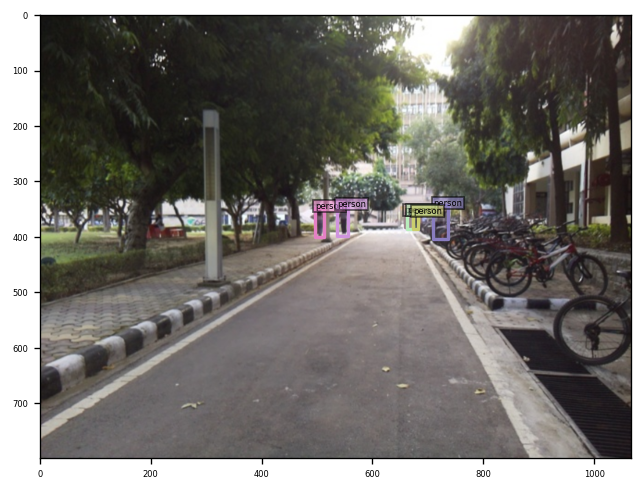

savename: /content/results/epoch_12_actual.jpg/47-2024-09-24-08:51:01.710438.png
Visualizing Predicted Bounding Boxes
Error during loading or prediction for checkpoint /content/drive/MyDrive/checkpoint0011_4scale.pth: 6 = 18, 


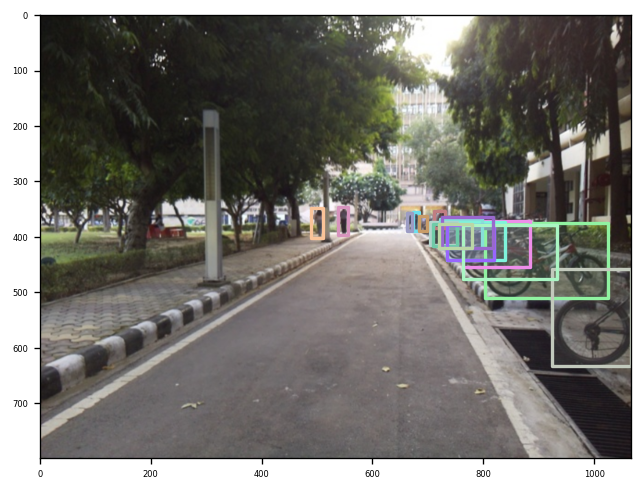

In [ ]:
# Run prediction for 12th Epoch Checkpoint
print("Running for 12th Epoch Checkpoint:")
load_model_and_predict("/content/drive/MyDrive/checkpoint0011_4scale.pth", epoch=12)


**Load and Predict for 24th Epoch Checkpoint**

Running for 24th Epoch Checkpoint:


<ipython-input-53-93b1e537f7d2>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location='cpu')


Visualizing Actual Bounding Boxes


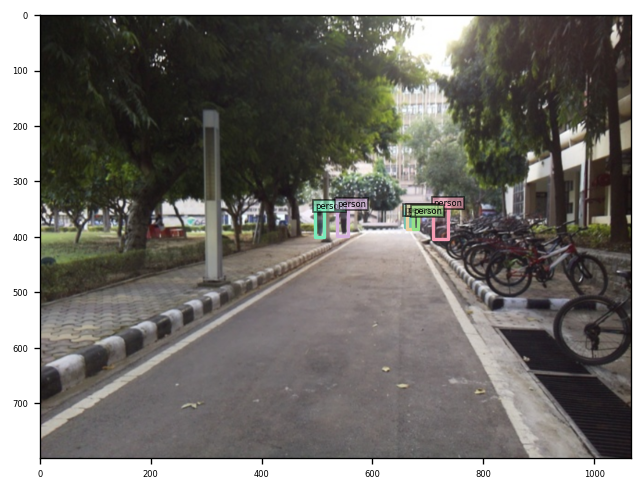

savename: /content/results/epoch_24_actual.jpg/47-2024-09-24-08:51:18.933425.png
Visualizing Predicted Bounding Boxes
Error during loading or prediction for checkpoint /content/drive/MyDrive/checkpoint0011_4scale24.pth: 6 = 18, 


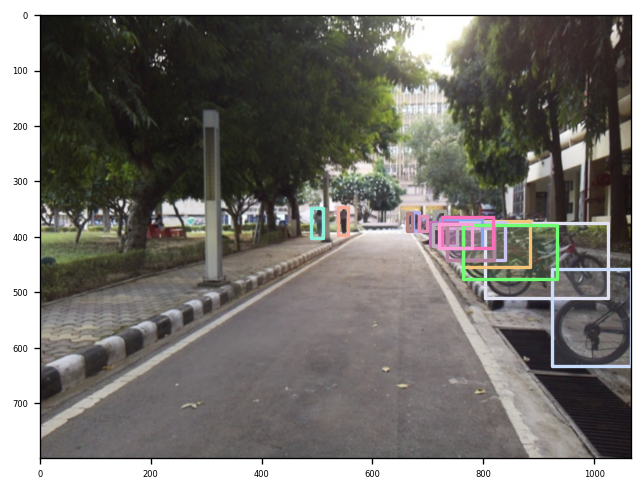

In [ ]:
# Run prediction for 24th Epoch Checkpoint
print("Running for 24th Epoch Checkpoint:")
load_model_and_predict("/content/drive/MyDrive/checkpoint0011_4scale24.pth", epoch=24)


**Load and Predict for 36th Epoch Checkpoint**

Running for 36th Epoch Checkpoint:


<ipython-input-53-93b1e537f7d2>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location='cpu')


Visualizing Actual Bounding Boxes


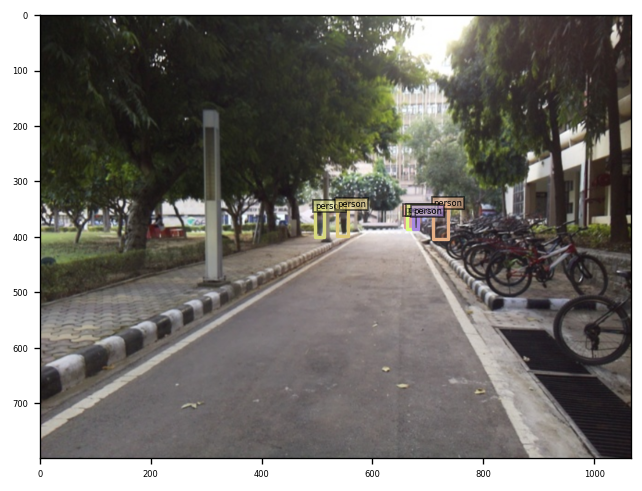

savename: /content/results/epoch_36_actual.jpg/47-2024-09-24-08:51:35.139743.png
Visualizing Predicted Bounding Boxes
Error during loading or prediction for checkpoint /content/drive/MyDrive/checkpoint0011_4scale36.pth: 6 = 18, 


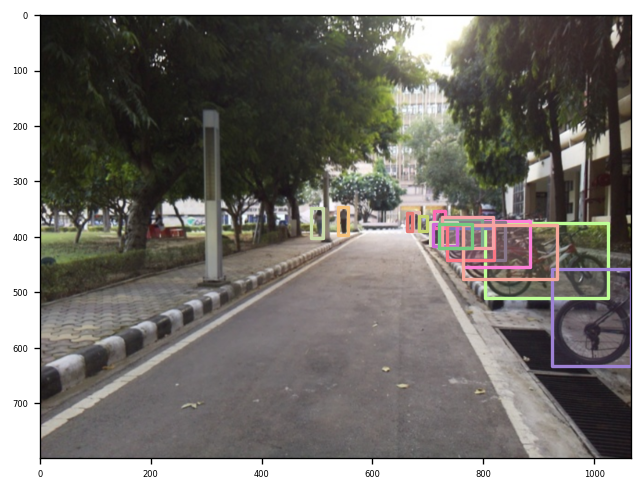

In [ ]:

print("Running for 36th Epoch Checkpoint:")
load_model_and_predict("/content/drive/MyDrive/checkpoint0011_4scale36.pth", epoch=36)


**Failure in accurate Object detection**

1.  Despite  different epoch checkpoints, the pre-trained model struggles with pedestrian detection.
2.  Over 80% of the dataset exhibits in-correct detections.
3. Complex scenes hinder accurate identification
4. Identifies extra classes


**Fine-Tuning the Pre-Trained Model**

In [ ]:
%cd /content/DINO

/content/DINO


In [ ]:
!bash /content/DINO/scripts/DINO_train.sh /content/DINO/COCODIR \
--pretrain_model_path /content/drive/MyDrive/checkpoint0011_4scale.pth \
--finetune_ignore label_enc.weight class_embed


**Re-Evaluating the results on the validation-set**

In [ ]:
!python main.py \
    --config_file config/DINO/DINO_4scale.py \
    --output_dir /content/DINO/results \
    --pretrain_model_path /content/DINO/logs/DINO/R50-MS4/checkpoint.pth \
    --coco_path /content/DINO/COCODIR \
    --eval \
    --options dn_scalar=100 embed_init_tgt=TRUE \
    dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False \
    dn_box_noise_scale=1.0


Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 10:45:19.158]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 10:45:19.158]: Command: main.py --config_file config/DINO/DINO_4scale.py --output_dir /content/DINO/results --pretrain_model_path /content/DINO/logs/DINO/R50-MS4/checkpoint.pth --coco_path /content/DINO/COCODIR --eval --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 10:45:19.158]: Full config saved to /content/DINO/results/config_args_all.json
[09/24 10:45:19.159]: world size: 1
[09/24 10:45:19.159]: rank: 0
[09/24 10:45:19.159]: local_rank: 0
[09/24 10:45:19.159]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/DINO/COCODIR', coco_panopt

**Testing the fine-tuned model on custom images/ Validation images**

In [ ]:
from PIL import Image
import datasets.transforms as T

In [ ]:
image = Image.open("/content/DINO/16268.jpg").convert("RGB")

In [ ]:
transform = T.Compose([
    T.RandomResize([800], max_size=1333),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
image, _ = transform(image, None)

In [ ]:
model_config_path = "config/DINO/DINO_4scale.py"
model_checkpoint_path = "/content/DINO/logs/DINO/R50-MS4/checkpoint.pth"


In [ ]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'
model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

<ipython-input-192-75b8576164e8>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_checkpoint_path, map_location='cpu')


In [ ]:
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

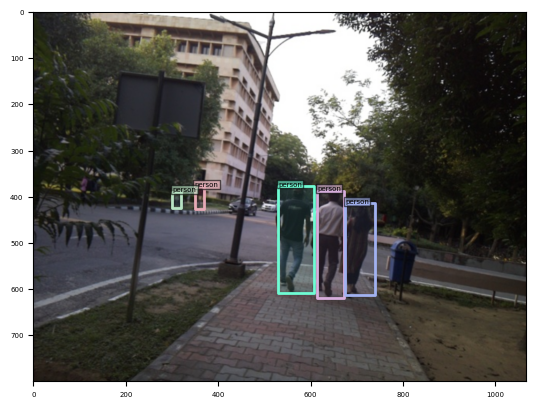

In [ ]:
thershold = 0.3 # set a thershold

vslzr = COCOVisualizer()

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

box_label = [id2name[int(item)] for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': torch.Tensor([image.shape[1], image.shape[2]]),
    'box_label': box_label
}
vslzr.visualize(image, pred_dict, savedir=None, dpi=100)

In [ ]:
import shutil

# Define the folder path and the output zip file path
folder_path = '/content/DINO'
output_zip = '/content/DINO.zip'

# Create a zip file
shutil.make_archive(output_zip.replace('.zip', ''), 'zip', folder_path)

print(f'Folder {folder_path} has been zipped into {output_zip}')


Folder /content/DINO has been zipped into /content/DINO.zip
